<a href="https://colab.research.google.com/github/Codechickdev/ML_Projects/blob/main/Yoga_Pose_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yoga Pose Classification

In [1]:
%%bash

pip install opendatasets --quiet

In [14]:
import os
import numpy as np
import pandas as pd
import opendatasets as od
from PIL import Image, ImageFile

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://www.kaggle.com/datasets/elysian01/yoga-pose-classification'

od.download(url)

100%|██████████| 528M/528M [00:25<00:00, 21.5MB/s]


In [6]:
def removeCorruptImage(path):
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path, filename))
            img.verify()
        except (IOError, SyntaxError) as e:
            print(f"Cannot Open File: {e}")
            os.remove(os.path.join(path, filename))

In [7]:
baseDir = '/content/yoga-pose-classification/dataset'

# Set - 1

train_path = os.path.join('yoga_set1', 'train')
test_path = os.path.join('yoga_set1', 'test')

trainDir = os.path.join(baseDir, train_path)
testDir = os.path.join(baseDir, test_path)

In [8]:
trainDir, testDir

('/content/yoga-pose-classification/dataset/yoga_set1/train',
 '/content/yoga-pose-classification/dataset/yoga_set1/test')

In [9]:
removeCorruptImage(os.path.join(trainDir, 'downdog'))
removeCorruptImage(os.path.join(trainDir, 'tree'))
removeCorruptImage(os.path.join(trainDir, 'warrior1'))

removeCorruptImage(os.path.join(testDir, 'downdog'))
removeCorruptImage(os.path.join(testDir, 'tree'))
removeCorruptImage(os.path.join(testDir, 'warrior1'))

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, rotation_range = 50, zoom_range = 0.5, vertical_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
BATCH_SIZE = 8
IMG_SHAPE = 300

train_datagen = train_datagen.flow_from_directory(
    directory = trainDir,
    batch_size = BATCH_SIZE,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True
)

val_datagen = val_datagen.flow_from_directory(
    directory = testDir,
    batch_size = BATCH_SIZE,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = False
)

Found 1184 images belonging to 3 classes.
Found 170 images belonging to 3 classes.


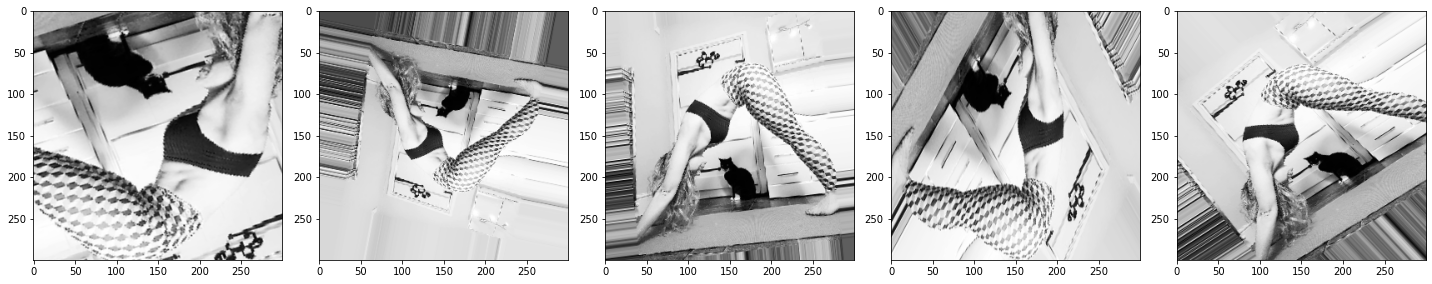

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augumented_image = [train_datagen[0][0][0] for i in range(5)]
plotImages(augumented_image)

In [15]:
OUTPUT_NEURON = 3

model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (300, 300, 3)),
    MaxPooling2D(pool_size = (2, 2)),

    Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.25),
    Dense(OUTPUT_NEURON)
])

optimizers = tf.keras.optimizers.SGD(learning_rate = 0.001)
losss = tf.keras.losses.CategoricalCrossentropy(from_logits = True)
model.compile(
    loss = losss,
    optimizer = optimizers,
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 360000)           

In [17]:
BATCH_SIZE = 16
EPOCHS = 10
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit(
    train_datagen,
    epochs = EPOCHS,
    validation_data = val_datagen
)

Epoch 1/10
148/148 [==============================] - 49s 333ms/step - loss: 1.1017 - accuracy: 0.3775 - val_loss: 1.1327 - val_accuracy: 0.2588
Epoch 2/10
148/148 [==============================] - 48s 324ms/step - loss: 1.0941 - accuracy: 0.3691 - val_loss: 1.1561 - val_accuracy: 0.0706
Epoch 3/10
148/148 [==============================] - 48s 324ms/step - loss: 1.0862 - accuracy: 0.3910 - val_loss: 1.1282 - val_accuracy: 0.3353
Epoch 4/10
148/148 [==============================] - 49s 330ms/step - loss: 1.0858 - accuracy: 0.3767 - val_loss: 1.0829 - val_accuracy: 0.3647
Epoch 5/10
148/148 [==============================] - 48s 326ms/step - loss: 1.0795 - accuracy: 0.4020 - val_loss: 1.0497 - val_accuracy: 0.3588
Epoch 6/10
148/148 [==============================] - 48s 325ms/step - loss: 1.0715 - accuracy: 0.4231 - val_loss: 1.1007 - val_accuracy: 0.3235
Epoch 7/10
148/148 [==============================] - 49s 330ms/step - loss: 1.0708 - accuracy: 0.4181 - val_loss: 1.1116 - val_ac

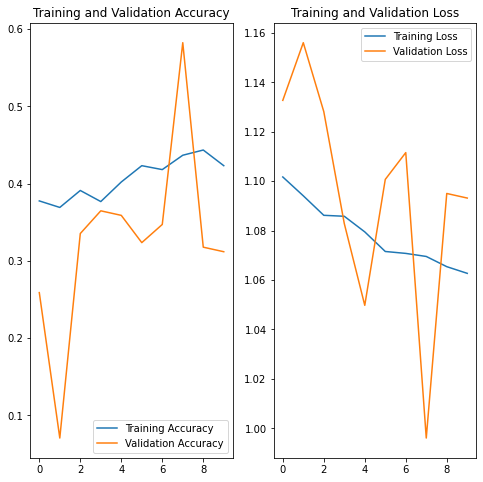

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()